Case Studies

Project: 1

Group: 3

Group Members:
 - Muhammad Raafey Tariq (231806)
 - Farrukh Ahmed (230614)
 - Amirreza Khamehchin Khiabani (230891)


Requirements:
 - numpy==1.24.2
 - matplotlib==3.7.1
 - seaborn==0.12.2
 - pandas==2.0.0
 - openpyxl==3.1.2

Installation Commands (One-time only)
 - pip install pandas==2.0.0
 - pip install numpy==1.24.2
 - pip install seaborn==0.12.2
 - pip install matplotlib==3.7.1
 - pip install openpyxl==3.1.2

Imports and Libraries

In [4]:
import pandas as pd
import numpy as np
import itertools
import pprint

# used for the graphs
import seaborn as sns
import os
sns.set(font_scale = 1.2)

# used for plotting
from matplotlib import pyplot as plt
import matplotlib

# setting font to 'Times New Roman'
matplotlib.rcParams["font.family"] = "Times New Roman"
matplotlib.rcParams.update({'font.size': 16})
%matplotlib inline

Global Variables and Constants

In [30]:
PLOT_DIR_NAME = "Project1-descriptive-data-analysis-plots"
if not os.path.isdir(PLOT_DIR_NAME):
    os.mkdir(PLOT_DIR_NAME)

Importing Data

In [43]:
file_path = "../styrian_health_data.xlsx"
sheet_name = "Sheet 1"
data_df = pd.read_excel(file_path, sheet_name=sheet_name)

c:\Users\Raafe\AppData\Local\Programs\Python\Python38\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


Reformating Columns to Correct Data Types

In [54]:
# data_df.postleitzahl = data_df.postleitzahl.astype('Int64')
# data_df.geburtsjahr = data_df.geburtsjahr.astype('Int64')
# data_df.befinden = data_df.befinden.astype('Int64')
# data_df.messwert_bp_sys = data_df.messwert_bp_sys.astype('Int64')
# data_df.messwert_bp_dia = data_df.messwert_bp_dia.astype("Float64")

In [61]:
data_df.postleitzahl = data_df.postleitzahl.astype('Int64')
data_df.geburtsjahr = data_df.geburtsjahr.astype('Int64')
data_df.befinden = data_df.befinden.astype('Int64')
data_df.messwert_bp_sys = pd.to_numeric(data_df.messwert_bp_sys)
data_df.messwert_bp_dia = pd.to_numeric(data_df.messwert_bp_dia)
data_df.schaetzwert_bp_sys = pd.to_numeric(data_df.schaetzwert_bp_sys)
data_df.schaetzwert_by_dia = pd.to_numeric(data_df.schaetzwert_by_dia)

In [62]:
data_df.head()

,id,zeit,terminal,postleitzahl,gemeinde,bezirk,bundesland,befinden,geburtsjahr,geschlecht,raucher,blutzucker_bekannt,cholesterin_bekannt,in_behandlung,schaetzwert_bp_sys,schaetzwert_by_dia,messwert_bp_sys,messwert_bp_dia
0,11519,2006-04-27 10:49:12,2,8054,Seiersberg,Graz-Umgebung,Steiermark,1,1967,m,False,True,False,False,142.0,89.0,179.0,111.0
1,11520,2006-04-27 11:10:46,2,8403,Lebring-Sankt Margarethen,Leibnitz,Steiermark,1,1968,m,False,False,False,False,140.0,70.0,109.0,80.0
2,11521,2006-04-27 11:21:09,2,8020,Graz - Gries,Graz(Stadt),Steiermark,1,1973,m,True,False,False,False,130.0,75.0,128.0,108.0
3,11522,2006-04-27 11:32:59,1,8044,Graz - Mariatrost,Graz(Stadt),Steiermark,1,1961,m,False,False,False,False,100.0,80.0,130.0,90.0
4,11524,2006-04-27 12:01:48,2,8010,Graz - Geidorf,Graz(Stadt),Steiermark,2,1978,f,False,False,False,False,140.0,70.0,144.0,103.0


In [46]:
print("Number of datapoints: ", len(data_df))
print("Number of variables: ", len(data_df.columns))
data_df.columns

Number of datapoints:  16386
Number of variables:  18


Index(['id', 'zeit', 'terminal', 'postleitzahl', 'gemeinde', 'bezirk',
       'bundesland', 'befinden', 'geburtsjahr', 'geschlecht', 'raucher',
       'blutzucker_bekannt', 'cholesterin_bekannt', 'in_behandlung',
       'schaetzwert_bp_sys', 'schaetzwert_by_dia', 'messwert_bp_sys',
       'messwert_bp_dia'],
      dtype='object')

Missing Values

In [47]:
# Counts for missing values per column
data_df.isna().sum()

id                       0
zeit                     0
terminal                 0
postleitzahl           334
gemeinde               331
bezirk                 331
bundesland             331
befinden                23
geburtsjahr             23
geschlecht              23
raucher                  0
blutzucker_bekannt       0
cholesterin_bekannt      0
in_behandlung            0
schaetzwert_bp_sys      45
schaetzwert_by_dia      56
messwert_bp_sys          0
messwert_bp_dia          0
dtype: int64

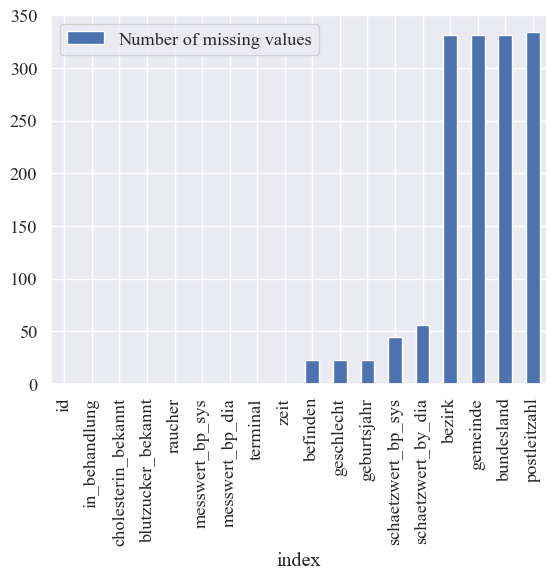

In [48]:
# representation as a bar plot
plot = data_df.isna().sum().sort_values().reset_index(name="Number of missing values").plot.bar(x="index", y="Number of missing values", rot=90)
plot.figure.savefig(os.path.join(PLOT_DIR_NAME, "missing_values_by_col.pdf"), dpi=180, bbox_inches='tight')

In [49]:
# identifying all rows in total with missing values

rows_with_nan = data_df[data_df.isna().any(axis=1)]
rows_with_nan.shape

(382, 18)

In [57]:
# dropping nan values
data_df_wo_nan = data_df.dropna()
data_df_wo_nan.shape

(16004, 18)

Continuous Variables

Discrete Variables

Correlation